# FASHION MNIST Classification

In [6]:
# import the important Library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation 
from keras.utils import to_categorical

In [8]:
# Load the Data
data = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [35]:
# Split data
(x_train,y_train), (x_test,y_test) = data

In [36]:
# Show the shape of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


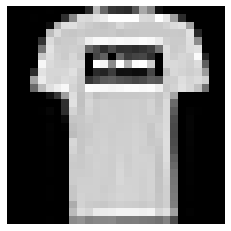

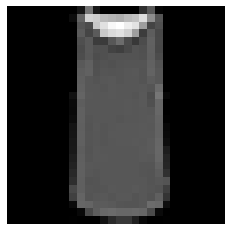

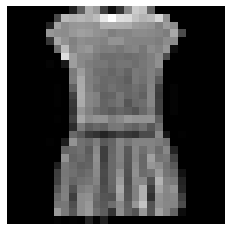

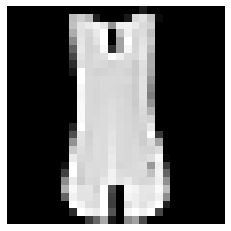

In [38]:
# show Data 
for i in range(1,5):
    plt.imshow(x_train[i],cmap='gray')
    plt.axis('off')
    plt.show()

In [39]:
# Reshaoing the datasets so that it works on keras API
# Keras accept input data as -> (num_img, img_shape, img_chenal)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [47]:
# Data Scaling & Normalization
# Making Sure that the values are float so that we can decimal points after division 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization
x_train/=255-0.5
x_test/=255-0.5

# Convert the lable into a categorical by using one hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [59]:
# Creating the Sequential model
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)         

In [60]:
# Compile the Model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
hist = model.fit(x_train, y_train, epochs = 10, batch_size = 256, verbose = 1,validation_split = 0.20)

Epoch 1/10
188/188 [==============================] - 302s 2s/step - loss: 1.7945 - accuracy: 0.3308 - val_loss: 0.8331 - val_accuracy: 0.7031
Epoch 2/10
188/188 [==============================] - 267s 1s/step - loss: 0.7439 - accuracy: 0.7182 - val_loss: 0.7679 - val_accuracy: 0.7283
Epoch 3/10
188/188 [==============================] - 296s 2s/step - loss: 0.6527 - accuracy: 0.7537 - val_loss: 0.6260 - val_accuracy: 0.7728
Epoch 4/10
188/188 [==============================] - 313s 2s/step - loss: 0.5750 - accuracy: 0.7811 - val_loss: 0.5803 - val_accuracy: 0.7923
Epoch 5/10
188/188 [==============================] - 266s 1s/step - loss: 0.5371 - accuracy: 0.7976 - val_loss: 0.5585 - val_accuracy: 0.7941
Epoch 6/10
188/188 [==============================] - 298s 2s/step - loss: 0.5088 - accuracy: 0.8106 - val_loss: 0.5119 - val_accuracy: 0.8163
Epoch 7/10
188/188 [==============================] - 303s 2s/step - loss: 0.4852 - accuracy: 0.8204 - val_loss: 0.4687 - val_accuracy: 0.8329

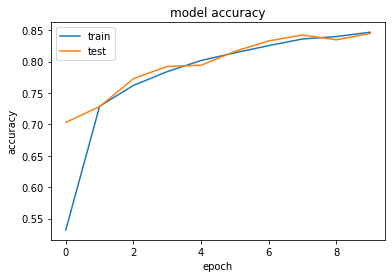

In [61]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

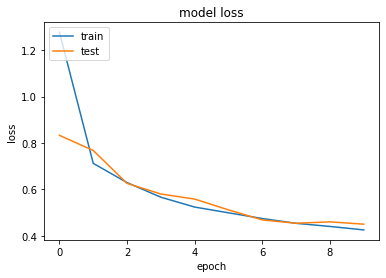

In [62]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
## Simple accuracy Find

In [63]:
# Score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.4634612202644348
Test accuracy 0.839900016784668


In [ ]:
## Accuracy Find by using Confusion matrix

In [68]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.68      0.74      0.71      1000
           3       0.81      0.88      0.85      1000
           4       0.80      0.63      0.71      1000
           5       0.97      0.94      0.95      1000
           6       0.58      0.59      0.58      1000
           7       0.94      0.93      0.93      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[814   2  27  58   3   0  80   0  16   0]
 [  3 966   1  23   3   0   3   0   1   0]
 [ 13   2 740  14  80   0 143   0   8   0]
 [ 15  19  18 883  18   0  42   0   5   0]
 [  1   2 158  55 631   0 149   0   4   0]
 [  1   0   0   1   0 939 

In [70]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)


cm

array([[814,   2,  27,  58,   3,   0,  80,   0,  16,   0],
       [  3, 966,   1,  23,   3,   0,   3,   0,   1,   0],
       [ 13,   2, 740,  14,  80,   0, 143,   0,   8,   0],
       [ 15,  19,  18, 883,  18,   0,  42,   0,   5,   0],
       [  1,   2, 158,  55, 631,   0, 149,   0,   4,   0],
       [  1,   0,   0,   1,   0, 939,   0,  29,   9,  21],
       [163,   4, 127,  46,  50,   0, 590,   0,  20,   0],
       [  0,   0,   0,   0,   0,  19,   0, 930,   3,  48],
       [  3,   1,  20,   8,   2,   1,  14,   4, 946,   1],
       [  0,   0,   0,   0,   0,  10,   0,  29,   1, 960]], dtype=int64)

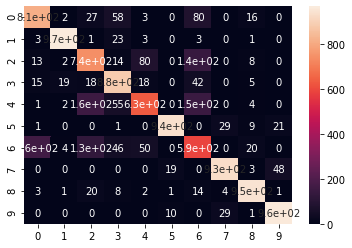

In [71]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [72]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.8399